Downloading necessary dependencies

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Here, we are pre-processing the data i.e. We are converting the text into lowercase, removing puncutations, special characters and digits. Further, we are tokenising the data and stemming it using Porter Stemming Algorithm.

In [5]:
import os
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download stopwords if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to preprocess a document
def preprocess_document(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuations, special characters, and digits using regex
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Apply Porter Stemming to each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Function to read documents from a directory
def preprocess_documents_from_directory(directory_path):
    preprocessed_docs = []
    
    # Loop through all the files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if it's a file (ignore directories)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                preprocessed_text = preprocess_document(text)
                
                # Store the preprocessed tokens using the filename as key
                preprocessed_docs.append(preprocessed_text)
    
    return preprocessed_docs

# Path to your directory containing documents
directory_path = '/kaggle/input/new-documents/documents'

# Preprocess the documents
preprocessed_documents = preprocess_documents_from_directory(directory_path)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Just representation of one of the documents after pre processing

In [6]:
preprocessed_documents[1]

['thi',
 'articl',
 'is',
 'more',
 'than',
 'month',
 'old',
 'thi',
 'articl',
 'is',
 'more',
 'than',
 'month',
 'old',
 'tourist',
 'attract',
 'and',
 'museum',
 'in',
 'central',
 'pari',
 'have',
 'said',
 'they',
 'will',
 'not',
 'open',
 'on',
 'saturday',
 'when',
 'fresh',
 'gilet',
 'jaun',
 'yellow',
 'vest',
 'protest',
 'are',
 'plan',
 'as',
 'french',
 'author',
 'prepar',
 'to',
 'deploy',
 'secur',
 'personnel',
 'across',
 'the',
 'countri',
 'the',
 'demonstr',
 'announc',
 'on',
 'saturday',
 'decemb',
 'in',
 'pari',
 'do',
 'not',
 'allow',
 'us',
 'to',
 'welcom',
 'visitor',
 'in',
 'safe',
 'condit',
 'said',
 'the',
 'oper',
 'of',
 'the',
 'eiffel',
 'tower',
 'in',
 'a',
 'statement',
 'on',
 'thursday',
 'polic',
 'have',
 'also',
 'order',
 'about',
 'a',
 'dozen',
 'museum',
 'includ',
 'the',
 'louvr',
 'and',
 'the',
 'grand',
 'palai',
 'cultur',
 'site',
 'such',
 'as',
 'the',
 'opera',
 'and',
 'shop',
 'along',
 'the',
 'champslys',
 'to',
 'cl

Pre-Processing the queries now using the same methodology

In [9]:
queries= [
    "Three bombings kill at least 17 people in Baghdad.",
    "Fires in Indonesia burn and blow smoke into Singapore, engulfing the city-state into darkness.",
    "At least 80 Shia pilgrims are killed in a truck bomb attack in Iraq. Islamic State of Iraq and the Levant claims responsibility.",
    "Voters in Austria go to the polls to elect a new President in a second round run-off between Green candidate Alexander Van der Bellen and Freedom Party of Austria candidate Norbert Hofer. Projections show that Van der Bellen has won with Hofer conceding defeat.",
    "The U.S. Supreme Court upholds an appeals court decision in an insider trading case, Salman v. U.S., holding that there is no requirement that a tipper receive any pecuniary consideration for a breach of faith in order to predicate the prosecution of the tippee.",
    "Colombian President Juan Manuel Santos and FARC guerrilla leader Rodrigo Londoño, also known as Timochenko, sign a peace accord in Cartagena, ending the longest running armed conflict in the Western Hemisphere. The final agreement will be submitted to popular ratification in a referendum on October 2.",
    "A gunman shoot dead a policemen in Cairo.",
    "The New York City Metropolitan Opera cancels its Saturday performances as a man, during an afternoon intermission, sprinkled an unidentified powder, suspected to be cremated ashes, into the orchestra pit. One person was exposed and requested medical attention.",
    "Iran releases Canadian-Iranian sociocultural anthropologist Homa Hoodfar, who had been held since June, as the countries begin talks on restoration of diplomatic ties.",
    "Elections are held in The Gambia.",
]

In [6]:
preprocessed_queries = [preprocess_document(query) for query in queries]

Showing the pre processed queries

In [7]:
preprocessed_queries

[['three', 'bomb', 'kill', 'at', 'least', 'peopl', 'in', 'baghdad'],
 ['fire',
  'in',
  'indonesia',
  'burn',
  'and',
  'blow',
  'smoke',
  'into',
  'singapor',
  'engulf',
  'the',
  'cityst',
  'into',
  'dark'],
 ['at',
  'least',
  'shia',
  'pilgrim',
  'are',
  'kill',
  'in',
  'a',
  'truck',
  'bomb',
  'attack',
  'in',
  'iraq',
  'islam',
  'state',
  'of',
  'iraq',
  'and',
  'the',
  'levant',
  'claim',
  'respons'],
 ['voter',
  'in',
  'austria',
  'go',
  'to',
  'the',
  'poll',
  'to',
  'elect',
  'a',
  'new',
  'presid',
  'in',
  'a',
  'second',
  'round',
  'runoff',
  'between',
  'green',
  'candid',
  'alexand',
  'van',
  'der',
  'bellen',
  'and',
  'freedom',
  'parti',
  'of',
  'austria',
  'candid',
  'norbert',
  'hofer',
  'project',
  'show',
  'that',
  'van',
  'der',
  'bellen',
  'ha',
  'won',
  'with',
  'hofer',
  'conced',
  'defeat'],
 ['the',
  'us',
  'suprem',
  'court',
  'uphold',
  'an',
  'appeal',
  'court',
  'decis',
  'in

Here, we are just trying to gather the documents without pre processing.

In [7]:
def preprocess_documents_from_directory(directory_path):
    preprocessed_docs = []
    
    # Loop through all the files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if it's a file (ignore directories)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                preprocessed_text = text
                
                # Store the preprocessed tokens using the filename as key
                preprocessed_docs.append(preprocessed_text)
    
    return preprocessed_docs


documents = preprocess_documents_from_directory(directory_path)

Now, we are calculating the tf-idf matrix using the inbuilt function present in the scikit-learn library.<br>
Here, we have provided the custom pre processor function which does the same thing as earlier.<br>
Here, vocabulary used is basically the unique set of words present in the entire corpus of documents.

In [9]:
import re
from nltk.stem import PorterStemmer
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the Porter stemmer once
stemmer = PorterStemmer()

def custom_preprocessor(text):
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join stemmed words back into a single string
    return ' '.join(stemmed_words)

# Initialize TfidfVectorizer without custom preprocessing
vectorizer = TfidfVectorizer(stop_words=None, preprocessor=custom_preprocessor)

# Fit and transform the processed documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert the sparse matrix to a dense matrix for readability
print(tfidf_matrix.toarray())

# Print the feature names
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa' 'aaa' 'aaaa' ... 'zypri' 'zyuganov' 'zzzof']


In [10]:
tfidf_matrix.shape

(7584, 223150)

In [20]:
!pip install rank_bm25

Now, we are calculating the bm25 matrix using inbuilt functionalities. Here the documents will be represented in the vector form where the dimensions will be queries themselves.

In [12]:
from rank_bm25 import BM25Okapi
import numpy as np

# Initialize the BM25 model with the documents
bm25 = BM25Okapi(preprocessed_documents, k1=1.5, b=0.7)

# Initialize a matrix to hold the BM25 scores
bm25_matrix = np.zeros((len(preprocessed_documents), len(preprocessed_queries)))

# Calculate BM25 score for each document-query pair
for i, query in enumerate(preprocessed_queries):
    query_scores = bm25.get_scores(query)
    bm25_matrix[:, i] = query_scores

In [13]:
bm25_matrix.shape

(7584, 10)

Calculating the top p stems from the entire corpus of documents.

In [14]:
from collections import Counter

# Function to get top p stems from the corpus
def get_top_stems(documents, p):
    # Initialize a Counter to accumulate frequencies of stems
    stem_counter = Counter()
    
    # Iterate through each document and accumulate stem counts
    for document in documents:
        # Tokenize each document (assuming it's preprocessed and stemmed)
        stems = document
        stem_counter.update(stems)  # Update counter with stems from the document
    
    # Get the top p stems based on frequency and return only the stems (not counts)
    top_stems = [stem for stem, _ in stem_counter.most_common(p)]
    
    return top_stems

p = 6

# Get top 5 stems from the corpus
top_stems = get_top_stems(preprocessed_documents, p)

# Print the top stems
print(top_stems)

['the', 'of', 'to', 'in', 'and', 'a']


Now, making vector of documents from these top p stems for both queries and documents.

In [15]:
import numpy as np

# Function to create binary vectors for documents based on top stems
def create_binary_vectors(documents, top_stems):
    # Initialize binary matrix
    num_docs = len(documents)
    num_stems = len(top_stems)
    binary_matrix = np.zeros((num_docs, num_stems), dtype=int)
    
    # Create a dictionary to map stems to column indices
    stem_index = {stem: idx for idx, stem in enumerate(top_stems)}
    
    for i, document in enumerate(documents):
        # Get the set of stems present in the document
        present_stems = set(document)
        
        for stem in present_stems:
            if stem in stem_index:
                col = stem_index[stem]
                binary_matrix[i, col] = 1
    
    return binary_matrix

# Create binary vectors for the documents
document_binary_vectors = create_binary_vectors(preprocessed_documents, top_stems)

In [16]:
query_binary_vectors = create_binary_vectors(preprocessed_queries, top_stems)

print(query_binary_vectors)

[[0 0 0 1 0 0]
 [1 0 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 0 1 1 1 1]
 [0 0 0 1 0 1]
 [1 0 1 0 1 1]
 [1 1 0 0 0 0]
 [1 0 0 1 0 0]]


In [17]:
def dot_product(document_binary_vectors, query_binary_vectors):
    final_list = []
    for doc_vector in document_binary_vectors:
        for query_vector in query_binary_vectors:
            resultant = np.dot(doc_vector, query_vector)
            
            # Check if the resultant is equal to the length of the vectors|
            if resultant == len(doc_vector):
                final_list.append(doc_vector)
    
    return final_list

Calculating the dot product between both the vectors which will basically give us the resultant vectors and further we will store those documents vectors which yield into a vector having all the values as 1.

In [18]:
final_list = dot_product(document_binary_vectors, query_binary_vectors)

In [19]:
len(final_list)

7565

Here is the thing, we have already calculated the tf-idf matrix above for the documents and we have calculated the bm25 matrix as well for the documents, so we are not calculating it again.

Now, here we are basically trying to calculate the query matrices in the tf-idf and bm25 space of the documents.

Here, we are basically using the same vocabulary as we used for the tf-idf matrix of the documents.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create the TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer(stop_words=None, preprocessor=custom_preprocessor)

# Fit the vectorizer on documents to create the document TF-IDF matrix
document_tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Use the same vectorizer to transform the queries into the same space
query_tfidf_matrix = vectorizer.transform(queries)

# Step 3: Convert both matrices to dense format for readability (optional)
document_tfidf_dense = document_tfidf_matrix.toarray()
query_tfidf_dense = query_tfidf_matrix.toarray()

# Print the resulting TF-IDF matrices
print("Document TF-IDF Matrix:")
print(document_tfidf_dense)

print("Query TF-IDF Matrix (in document space):")
print(query_tfidf_dense)

# Step 4: Print the feature names (vocabulary)
print("Vocabulary (Feature Names):")
print(vectorizer.get_feature_names_out())


Document TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Query TF-IDF Matrix (in document space):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulary (Feature Names):
['aa' 'aaa' 'aaaa' ... 'zypri' 'zyuganov' 'zzzof']


In [21]:
print(document_tfidf_dense.shape, query_tfidf_dense.shape)

(7584, 223150) (10, 223150)


Now, we are calculating the bm25 matrix for the query in the same space as documents matrix.

In [22]:
# Initialize the BM25 model with the queries as documents
bm25 = BM25Okapi(preprocessed_queries, k1=1.5, b=0.7)

# Initialize a matrix to hold BM25 scores between queries
num_queries = 10
bm25_query_matrix = np.zeros((num_queries, num_queries))

# Calculate BM25 scores between each pair of queries
for i in range(num_queries):
    for j in range(num_queries):
        # Compute BM25 score between query i and query j
        score = bm25.get_scores(preprocessed_queries[j])[i]  # BM25 score of query j with respect to query i
        bm25_query_matrix[i][j] = score

# Print the resulting BM25 query-query matrix
print("BM25 Query-Query Matrix:")
print(bm25_query_matrix)

BM25 Query-Query Matrix:
[[15.67683812  0.61950357  8.30410241  1.23900714  1.23900714  1.85851071
   0.61950357  0.          0.          0.61950357]
 [ 0.53653434 25.91787039  1.60960302  1.60960302  2.6826717   3.21920604
   0.53653434  3.1126944   0.53653434  1.07306868]
 [ 5.83104952  1.09451622 32.1862237   3.03428482  4.33477847  4.19403117
   1.54975748  1.36572378  0.84525239  2.39245986]
 [ 0.4945831   0.81592987  2.08039803 58.86588102  5.74908346  4.7768671
   1.48374929  2.47718794  0.59664875  1.73212538]
 [ 0.4945831   1.09751132  2.51039331  4.96569196 54.98727173  4.55700212
   1.48374929  4.79596473  1.02664402  1.09751132]
 [ 0.59792882  1.19585763  2.28333306  4.22032821  4.24040733 50.38753469
   1.57702203  3.42424138  2.06509593  1.19585763]
 [ 0.61950357  0.61950357  2.02452147  2.81003579  2.81003579  3.42953936
  15.51093102  0.78551433  0.          0.61950357]
 [ 0.          2.51931402  0.87649266  2.82058187  5.58518186  4.19586047
   0.6987424  48.88258559  

In [23]:
bm25_query_matrix.shape

(10, 10)

Using Cosine Similarity to calculate the similarity between the documents and query vectors and then ranking them based on their relevance to the query.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between each document vector and each query vector
similarity_matrix_tfidf = cosine_similarity(document_tfidf_dense, query_tfidf_dense)

# Print the similarity matrix (documents x queries)
print("Cosine Similarity Matrix (Documents x Queries) in TF-IDF Space:")
print(similarity_matrix_tfidf)

# Rank documents for each query based on similarity scores
for query_idx in range(similarity_matrix_tfidf.shape[1]):
    # Get similarity scores for the current query
    scores = similarity_matrix_tfidf[:, query_idx]
    # Get indices of documents sorted by their scores (highest first)
    ranked_doc_indices = np.argsort(scores)[::-1]
    print(f"Ranked Documents for Query {query_idx}: {ranked_doc_indices}")

Cosine Similarity Matrix (Documents x Queries) in TF-IDF Space:
[[0.10362973 0.08482366 0.18336831 ... 0.08498604 0.04416203 0.10352687]
 [0.0446559  0.0789684  0.10552818 ... 0.10715943 0.04830338 0.11011781]
 [0.09129863 0.05341169 0.11187088 ... 0.06259778 0.03165063 0.07930433]
 ...
 [0.05195917 0.0638894  0.10245791 ... 0.07349316 0.04171289 0.09244985]
 [0.03811585 0.04695934 0.06926042 ... 0.06209403 0.03297577 0.07358835]
 [0.02111262 0.05797915 0.06917933 ... 0.06151117 0.03107286 0.06807464]]
Ranked Documents for Query 0: [3167 7558 1357 ... 3676 5465 7571]
Ranked Documents for Query 1: [3937 2765  338 ...  660 3130 7571]
Ranked Documents for Query 2: [1847 7558 2425 ... 5465 7571 3130]
Ranked Documents for Query 3: [ 750 5578 5421 ... 6016 3130  660]
Ranked Documents for Query 4: [4105 7201 4353 ...  660 3130 5465]
Ranked Documents for Query 5: [4558  334 6349 ... 5465  660 7571]
Ranked Documents for Query 6: [4314 4628 5871 ... 5932 1532 3676]
Ranked Documents for Query 7: 

In [25]:
from sklearn.preprocessing import normalize

# Normalize BM25 matrices
bm25_normalized_docs = normalize(bm25_matrix, norm='l2')
bm25_normalized_queries = normalize(bm25_query_matrix, norm='l2')

# Compute cosine similarity between each document vector and each query vector
similarity_matrix_bm25 = cosine_similarity(bm25_normalized_docs, bm25_normalized_queries)

# Print the similarity matrix (documents x queries)
print("Cosine Similarity Matrix (Documents x Queries) in BM25 Space:")
print(similarity_matrix_bm25)

# Rank documents for each query based on similarity scores
for query_idx in range(similarity_matrix_bm25.shape[1]):
    # Get similarity scores for the current query
    scores = similarity_matrix_bm25[:, query_idx]
    # Get indices of documents sorted by their scores (highest first)
    ranked_doc_indices = np.argsort(scores)[::-1]
    print(f"Ranked Documents for Query {query_idx}: {ranked_doc_indices}")

Cosine Similarity Matrix (Documents x Queries) in BM25 Space:
[[0.43872906 0.36390719 0.60319032 ... 0.55489743 0.29671242 0.65642687]
 [0.34204699 0.3436356  0.45698908 ... 0.59445786 0.32450536 0.6461111 ]
 [0.37739486 0.32864522 0.50975692 ... 0.55567585 0.33494146 0.66380504]
 ...
 [0.36335819 0.33448334 0.49432931 ... 0.54771639 0.29787318 0.65621043]
 [0.33309758 0.32203335 0.47136014 ... 0.52480915 0.33547265 0.65566982]
 [0.31234862 0.36840436 0.45080504 ... 0.54908924 0.30068659 0.65106512]]
Ranked Documents for Query 0: [4754 5927 7558 ... 7571 5465 4184]
Ranked Documents for Query 1: [3937 5065 6637 ... 3130  750 7571]
Ranked Documents for Query 2: [4893 2425 7558 ... 5465  750 4184]
Ranked Documents for Query 3: [ 750 4742 7571 ... 3482 4105 4184]
Ranked Documents for Query 4: [4105 6016 5951 ...  334 6349  750]
Ranked Documents for Query 5: [ 334 6349   24 ... 7571  750 4184]
Ranked Documents for Query 6: [ 660 1297 3130 ... 5932 3482 4184]
Ranked Documents for Query 7: [4

Here, we are going to do the same tasks as we did earlier, before starting that we will remove the stop words from both the queries and the documents. 

In [10]:
# Function to load stop words from a file
def load_stop_words(file_path):
    with open(file_path, 'r') as file:
        stop_words = set(line.strip().lower() for line in file)
    return stop_words

# Function to preprocess a text by removing punctuations, special characters, digits, and stop words
def preprocess_text(text, stop_words):
    # Remove punctuation, special characters, and digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply Porter Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    return stemmed_tokens

# Example usage
stop_words_file = '/kaggle/input/stop-words/english.stop'  # Path to the file containing stop words
stop_words = load_stop_words(stop_words_file)

# Preprocessing documents
preprocessed_documents = [
    preprocess_text(doc, stop_words)
    for doc in documents
]

# Preprocessing queries
preprocessed_queries = [
    preprocess_text(query, stop_words)
    for query in queries
]

In [11]:
print(preprocessed_documents[0])

['explos', 'centr', 'afghan', 'capit', 'kabul', 'destroy', 'bu', 'carri', 'govern', 'employe', 'monday', 'kill', 'person', 'wound', 'interior', 'ministri', 'spokesman', 'sediq', 'sediqqi', 'secur', 'forc', 'surround', 'smoke', 'remain', 'complet', 'burnedout', 'bu', 'carri', 'employe', 'countri', 'biggest', 'telecom', 'firm', 'secur', 'offici', 'blast', 'caus', 'suicid', 'bomber', 'foot', 'sediqqi', 'appear', 'caus', 'roadsid', 'bomb', 'group', 'claim', 'respons', 'assault', 'taliban', 'step', 'attack', 'offici', 'start', 'annual', 'spring', 'offens', 'explos', 'minibu', 'kabul', 'polic', 'spokesman', 'basir', 'mujahid', 'told', 'afp', 'news', 'agenc', 'ad', 'casualti', 'fear', 'polic', 'investig', 'natur', 'explos', 'read', 'taliban', 'kill', 'afghan', 'polic', 'insid', 'attack', 'gunmen', 'disguis', 'doctor', 'storm', 'afghanistan', 'largest', 'militari', 'hospit', 'wednesday', 'kill', 'peopl', 'brazen', 'sixhour', 'attack', 'multipl', 'surviv', 'staff', 'secur', 'sourc', 'told', 'af

In [12]:
preprocessed_queries

[['bomb', 'kill', 'peopl', 'baghdad'],
 ['fire',
  'indonesia',
  'burn',
  'blow',
  'smoke',
  'singapor',
  'engulf',
  'cityst',
  'dark'],
 ['shia',
  'pilgrim',
  'kill',
  'truck',
  'bomb',
  'attack',
  'iraq',
  'islam',
  'state',
  'iraq',
  'levant',
  'claim',
  'respons'],
 ['voter',
  'austria',
  'poll',
  'elect',
  'presid',
  'round',
  'runoff',
  'green',
  'candid',
  'alexand',
  'van',
  'der',
  'bellen',
  'freedom',
  'parti',
  'austria',
  'candid',
  'norbert',
  'hofer',
  'project',
  'show',
  'van',
  'der',
  'bellen',
  'won',
  'hofer',
  'conced',
  'defeat'],
 ['suprem',
  'court',
  'uphold',
  'appeal',
  'court',
  'decis',
  'insid',
  'trade',
  'case',
  'salman',
  'hold',
  'requir',
  'tipper',
  'receiv',
  'pecuniari',
  'consider',
  'breach',
  'faith',
  'order',
  'predic',
  'prosecut',
  'tippe'],
 ['colombian',
  'presid',
  'juan',
  'manuel',
  'santo',
  'farc',
  'guerrilla',
  'leader',
  'rodrigo',
  'londoño',
  'timochen

Now, again calculating tf-idf matrix by removing the stop words.

In [13]:
stop_words

{'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [14]:
def preprocess_and_stem_stop_words(stop_words):
    preprocessed_stop_words = set()
    for word in stop_words:
        # Preprocessing: remove punctuation, special characters, digits, and convert to lowercase
        word = re.sub(r'[^\w\s]', '', word)  # Remove punctuation
        word = re.sub(r'\d+', '', word)  # Remove digits
        word = word.lower()  # Convert to lowercase
        # Stemming
        stemmed_word = stemmer.stem(word)
        preprocessed_stop_words.add(stemmed_word)
    return preprocessed_stop_words

In [15]:
preprocessed_stop_words = preprocess_and_stem_stop_words(stop_words)

In [16]:
preprocessed_stop_words = list(preprocessed_stop_words)

In [17]:
import re
from nltk.stem import PorterStemmer
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the Porter stemmer once
stemmer = PorterStemmer()

def custom_preprocessor(text):
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join stemmed words back into a single string
    return ' '.join(stemmed_words)


# Initialize the Porter stemmer once
stemmer = PorterStemmer()

# Initialize TfidfVectorizer without custom preprocessing
vectorizer = TfidfVectorizer(stop_words = preprocessed_stop_words, preprocessor=custom_preprocessor)

# Fit and transform the processed documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert the sparse matrix to a dense matrix for readability
print(tfidf_matrix.toarray())

# Print the feature names
print(vectorizer.get_feature_names_out())

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'cau', 'cour', 'el', 'elsewh', 'everywh', 'ind', 'obviou', 'otherwi', 'plea', 'somewh'] not in stop_words.
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa' 'aaa' 'aaaa' ... 'zypri' 'zyuganov' 'zzzof']


In [18]:
tfidf_matrix.shape

(7584, 222684)

Calculating the bm25 matrix

In [22]:
from rank_bm25 import BM25Okapi
import numpy as np

# Initialize the BM25 model with the documents
bm25 = BM25Okapi(preprocessed_documents)

# Initialize a matrix to hold the BM25 scores
bm25_matrix = np.zeros((len(preprocessed_documents), len(preprocessed_queries)))

# Calculate BM25 score for each document-query pair
for i, query in enumerate(preprocessed_queries):
    query_scores = bm25.get_scores(query)
    bm25_matrix[:, i] = query_scores

In [23]:
bm25_matrix.shape

(7584, 10)

Again, calculating the top p stems.

In [57]:
p = 5

# Get top 5 stems from the corpus
top_stems = get_top_stems(preprocessed_documents, p)

# Print the top stems
print(top_stems)

['peopl', 'state', 'year', 'presid', 'trump']


In [58]:
# Create binary vectors for the documents
document_binary_vectors = create_binary_vectors(preprocessed_documents, top_stems)

query_binary_vectors = create_binary_vectors(preprocessed_queries, top_stems)

print(query_binary_vectors)

[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


Since, there was no query vector which had all the ones, the logical AND will always lead to a vector which won't have all the values as 1 in it.

In [59]:
final_list = dot_product(document_binary_vectors, query_binary_vectors)

print(len(final_list))

0


Calculating the tf-idf matrix for the query in the document's tf-idf space.

In [60]:
# Step 1: Create the TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer(stop_words = preprocessed_stop_words, preprocessor=custom_preprocessor)

# Fit the vectorizer on documents to create the document TF-IDF matrix
document_tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Use the same vectorizer to transform the queries into the same space
query_tfidf_matrix = vectorizer.transform(queries)

# Step 3: Convert both matrices to dense format for readability (optional)
document_tfidf_dense = document_tfidf_matrix.toarray()
query_tfidf_dense = query_tfidf_matrix.toarray()

# Print the resulting TF-IDF matrices
print("Document TF-IDF Matrix:")
print(document_tfidf_dense)

print("Query TF-IDF Matrix (in document space):")
print(query_tfidf_dense)

# Step 4: Print the feature names (vocabulary)
print("Vocabulary (Feature Names):")
print(vectorizer.get_feature_names_out())

Document TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Query TF-IDF Matrix (in document space):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulary (Feature Names):
['aa' 'aaa' 'aaaa' ... 'zypri' 'zyuganov' 'zzzof']


In [61]:
print(document_tfidf_dense.shape, query_tfidf_dense.shape)

(7584, 222684) (10, 222684)


Calculating the bm25 matrix in the space.

In [62]:
# Initialize the BM25 model with the queries as documents
bm25 = BM25Okapi(preprocessed_queries)

# Initialize a matrix to hold BM25 scores between queries
num_queries = 10
bm25_query_matrix = np.zeros((num_queries, num_queries))

# Calculate BM25 scores between each pair of queries
for i in range(num_queries):
    for j in range(num_queries):
        # Compute BM25 score between query i and query j
        score = bm25.get_scores(preprocessed_queries[j])[i]  # BM25 score of query j with respect to query i
        bm25_query_matrix[i][j] = score

# Print the resulting BM25 query-query matrix
print("BM25 Query-Query Matrix:")
print(bm25_query_matrix)

BM25 Query-Query Matrix:
[[ 9.17387274  0.          3.65739911  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         20.3033466   0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 2.61095147  0.         25.85302355  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         45.25933248  0.          0.88395164
   0.          0.          0.          0.88395164]
 [ 0.          0.          0.          0.         35.21852927  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.8653247   0.         37.41018655
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  13.20321318  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         34.36374214  0.          0.        ]
 [ 0.          0.      

In [63]:
bm25_query_matrix.shape

(10, 10)

Calculating the similarities and further ranking them as well.

In [64]:
# Compute cosine similarity between each document vector and each query vector
similarity_matrix_tfidf = cosine_similarity(document_tfidf_dense, query_tfidf_dense)

# Print the similarity matrix (documents x queries)
print("Cosine Similarity Matrix (Documents x Queries) in TF-IDF Space:")
print(similarity_matrix_tfidf)

# Rank documents for each query based on similarity scores
for query_idx in range(similarity_matrix_tfidf.shape[1]):
    # Get similarity scores for the current query
    scores = similarity_matrix_tfidf[:, query_idx]
    # Get indices of documents sorted by their scores (highest first)
    ranked_doc_indices = np.argsort(scores)[::-1]
    print(f"Ranked Documents for Query {query_idx}: {ranked_doc_indices}")

Cosine Similarity Matrix (Documents x Queries) in TF-IDF Space:
[[0.07687858 0.02305092 0.11014624 ... 0.0155348  0.00409462 0.        ]
 [0.01570796 0.00575518 0.00335138 ... 0.0376804  0.00484051 0.00341861]
 [0.07768103 0.00101468 0.03932436 ... 0.00721666 0.00284637 0.00293007]
 ...
 [0.02323826 0.00178933 0.01184778 ... 0.0094832  0.0038095  0.00403885]
 [0.         0.         0.00189364 ... 0.00224751 0.00279315 0.        ]
 [0.00026443 0.00430003 0.00108709 ... 0.00369455 0.00157566 0.        ]]
Ranked Documents for Query 0: [7558 3167 1357 ... 3731 3753 3962]
Ranked Documents for Query 1: [3937 2765  338 ... 5395 5397 7144]
Ranked Documents for Query 2: [1847 6058 2425 ... 2101 2099 1583]
Ranked Documents for Query 3: [ 750 5578 5421 ...  445 1436 6068]
Ranked Documents for Query 4: [4105 7233 7201 ... 4976 1462 2316]
Ranked Documents for Query 5: [4558  334  449 ... 3268 1634 6334]
Ranked Documents for Query 6: [4314 4628 5871 ... 3709 6659 3031]
Ranked Documents for Query 7: 

In [65]:
from sklearn.preprocessing import normalize

# Normalize BM25 matrices
bm25_normalized_docs = normalize(bm25_matrix, norm='l2')
bm25_normalized_queries = normalize(bm25_query_matrix, norm='l2')

# Compute cosine similarity between each document vector and each query vector
similarity_matrix_bm25 = cosine_similarity(bm25_normalized_docs, bm25_normalized_queries)

# Print the similarity matrix (documents x queries)
print("Cosine Similarity Matrix (Documents x Queries) in BM25 Space:")
print(similarity_matrix_bm25)

# Rank documents for each query based on similarity scores
for query_idx in range(similarity_matrix_bm25.shape[1]):
    # Get similarity scores for the current query
    scores = similarity_matrix_bm25[:, query_idx]
    # Get indices of documents sorted by their scores (highest first)
    ranked_doc_indices = np.argsort(scores)[::-1]
    print(f"Ranked Documents for Query {query_idx}: {ranked_doc_indices}")

Cosine Similarity Matrix (Documents x Queries) in BM25 Space:
[[0.59130742 0.18972845 0.86152973 ... 0.33349395 0.11401717 0.06312831]
 [0.30963392 0.09059079 0.2348563  ... 0.71176791 0.17005548 0.12589549]
 [0.56680712 0.02061038 0.61815957 ... 0.42912958 0.26448071 0.16144597]
 ...
 [0.44491353 0.06194865 0.49107257 ... 0.41221342 0.16605836 0.21479536]
 [0.09869103 0.         0.26514619 ... 0.12034727 0.23304166 0.28502547]
 [0.24451012 0.33593935 0.37299999 ... 0.44835172 0.0949701  0.17629558]]
Ranked Documents for Query 0: [1100  938 3800 ...  967 5514 5543]
Ranked Documents for Query 1: [6808 5065 3473 ... 3337 6416 6860]
Ranked Documents for Query 2: [5870 5764 6355 ...  467 5702 6236]
Ranked Documents for Query 3: [1492 7225  750 ... 4741 3090 6811]
Ranked Documents for Query 4: [4105 5674 6578 ... 6418 6422  510]
Ranked Documents for Query 5: [4885 3130  334 ... 7499  202 7328]
Ranked Documents for Query 6: [4784 2738 1583 ... 5467 3136 6730]
Ranked Documents for Query 7: [3

In [24]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 10  # You can adjust this number based on your needs

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print out cluster labels for each document
for i, label in enumerate(cluster_labels):
    print(f"Document {i} is in cluster {label}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Document 0 is in cluster 7
Document 1 is in cluster 3
Document 2 is in cluster 0
Document 3 is in cluster 7
Document 4 is in cluster 0
Document 5 is in cluster 0
Document 6 is in cluster 8
Document 7 is in cluster 0
Document 8 is in cluster 0
Document 9 is in cluster 0
Document 10 is in cluster 0
Document 11 is in cluster 0
Document 12 is in cluster 2
Document 13 is in cluster 0
Document 14 is in cluster 8
Document 15 is in cluster 0
Document 16 is in cluster 0
Document 17 is in cluster 0
Document 18 is in cluster 9
Document 19 is in cluster 8
Document 20 is in cluster 3
Document 21 is in cluster 8
Document 22 is in cluster 0
Document 23 is in cluster 5
Document 24 is in cluster 0
Document 25 is in cluster 0
Document 26 is in cluster 3
Document 27 is in cluster 5
Document 28 is in cluster 0
Document 29 is in cluster 0
Document 30 is in cluster 6
Document 31 is in cluster 6
Document 32 is in cluster 8
Document 33 is in cluster 3
Document 34 is in cluster 3
Document 35 is in cluster 3
Do

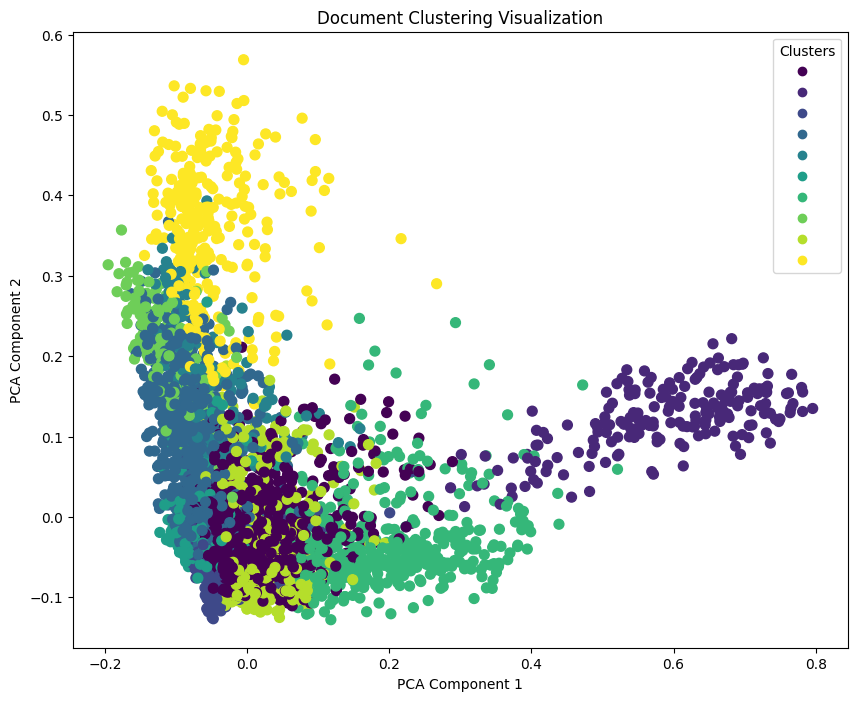

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Plot the documents in 2D space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Add a legend
plt.legend(handles=scatter.legend_elements()[0], title="Clusters")

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering Visualization')

# Show plot
plt.show()

In [26]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 10  # You can adjust this number based on your needs

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(bm25_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print out cluster labels for each document
for i, label in enumerate(cluster_labels):
    print(f"Document {i} is in cluster {label}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Document 0 is in cluster 4
Document 1 is in cluster 5
Document 2 is in cluster 5
Document 3 is in cluster 4
Document 4 is in cluster 9
Document 5 is in cluster 1
Document 6 is in cluster 8
Document 7 is in cluster 9
Document 8 is in cluster 1
Document 9 is in cluster 8
Document 10 is in cluster 7
Document 11 is in cluster 7
Document 12 is in cluster 7
Document 13 is in cluster 6
Document 14 is in cluster 6
Document 15 is in cluster 5
Document 16 is in cluster 1
Document 17 is in cluster 6
Document 18 is in cluster 5
Document 19 is in cluster 8
Document 20 is in cluster 4
Document 21 is in cluster 9
Document 22 is in cluster 1
Document 23 is in cluster 1
Document 24 is in cluster 3
Document 25 is in cluster 9
Document 26 is in cluster 1
Document 27 is in cluster 7
Document 28 is in cluster 7
Document 29 is in cluster 1
Document 30 is in cluster 0
Document 31 is in cluster 0
Document 32 is in cluster 9
Document 33 is in cluster 1
Document 34 is in cluster 5
Document 35 is in cluster 1
Do

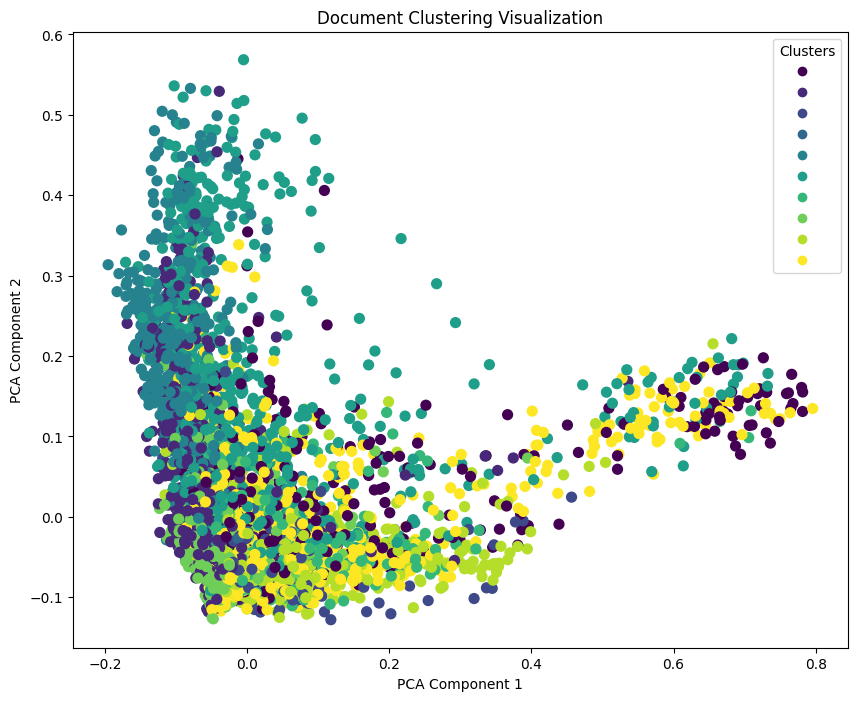

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Plot the documents in 2D space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Add a legend
plt.legend(handles=scatter.legend_elements()[0], title="Clusters")

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering Visualization')

# Show plot
plt.show()